Notebook for analyzing the distribution of dendritic spikes across random_seed & depth_of_modulation

In [1]:
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-01-13-14-26-16-BenSynapses_testing_depth_of_mod"

In [2]:
%cd ../scripts

/home/drfrbc/Neural-Modeling/scripts


In [3]:
# from count_spikes_across_seeds import count_events
from count_spikes_across_seeds import aggregate_simulation_data

In [4]:
# Generate .csv's for dendritic events
!python find_events_ben.py -f {sim_directory}

simulations_directory: /home/drfrbc/Neural-Modeling/scripts/2025-01-13-14-26-16-BenSynapses_testing_depth_of_mod
sim_directory: Complex_InhGmaxApic7.1_InhGmaxDend0.0016_SomaGmax0.0025_ExcGmax-1.0351_Np1000_RhythDepth0
--No graphics will be displayed.
sim_directory: Complex_InhGmaxApic7.1_InhGmaxDend0.0016_SomaGmax0.0025_ExcGmax-1.0351_Np100000_RhythDepth0
sim_directory: Complex_InhGmaxApic7.1_InhGmaxDend0.0016_SomaGmax0.0025_ExcGmax-1.0351_Np10000000_RhythDepth0
sim_directory: Complex_InhGmaxApic7.1_InhGmaxDend0.0016_SomaGmax0.0025_ExcGmax-1.0351_Np500000_RhythDepth0
sim_directory: Complex_InhGmaxApic7.1_InhGmaxDend0.0016_SomaGmax0.0025_ExcGmax-1.0351_Np10000000_RhythDepth0.05
sim_directory: Complex_InhGmaxApic7.1_InhGmaxDend0.0016_SomaGmax0.0025_ExcGmax-1.0351_Np10000000_RhythDepth0.1
sim_directory: Complex_InhGmaxApic7.1_InhGmaxDend0.0016_SomaGmax0.0025_ExcGmax-1.0351_Np100000_RhythDepth0.05
sim_directory: Complex_InhGmaxApic7.1_InhGmaxDend0.0016_SomaGmax0.0025_ExcGmax-1.0351_Np10000

In [5]:
import sys
import os
sys.path.append(os.path.abspath(".."))
sys.path.append(os.path.abspath("../Modules"))
from Modules import synapse

--No graphics will be displayed.


In [6]:
spike_table = aggregate_simulation_data(sim_directory)

Retry 1/1000 failed: Trace length is 17 not 20, retrying...
Retry 2/1000 failed: Trace length is 17 not 20, retrying...
Retry 3/1000 failed: Trace length is 13 not 20, retrying...
Retry 4/1000 failed: Trace length is 14 not 20, retrying...
Retry 5/1000 failed: Trace length is 17 not 20, retrying...
Retry 6/1000 failed: Trace length is 16 not 20, retrying...
Retry 7/1000 failed: Trace length is 15 not 20, retrying...
Retry 8/1000 failed: Trace length is 13 not 20, retrying...
Retry 9/1000 failed: Trace length is 14 not 20, retrying...
Retry 10/1000 failed: Trace length is 15 not 20, retrying...
Retry 11/1000 failed: Trace length is 17 not 20, retrying...
Retry 12/1000 failed: Trace length is 17 not 20, retrying...
Retry 13/1000 failed: Trace length is 14 not 20, retrying...
Retry 14/1000 failed: Trace length is 17 not 20, retrying...
Retry 15/1000 failed: Trace length is 13 not 20, retrying...
Retry 16/1000 failed: Trace length is 15 not 20, retrying...
Retry 17/1000 failed: Trace lengt

In [7]:
from Modules import analysis
# Initialize a list to store soma firing rates
soma_firing_rates = []

# Compute the soma firing rate for each simulation directory
for sim_dir in spike_table.simulation_directory:
    sim_path = os.path.join(sim_directory, sim_dir)
    
    # Read soma spikes data
    spks = analysis.DataReader.read_data(sim_path, "soma_spikes")
    
    # Load simulation parameters to get h_tstop
    params = analysis.DataReader.load_parameters(sim_path)
    
    # Calculate soma firing rate
    firing_rate = len(spks[0][:]) / (params.h_tstop / 1000)  # Convert ms to seconds
    soma_firing_rates.append(firing_rate)

# Add the soma firing rate column to spike_table
spike_table['soma_firing_rate'] = soma_firing_rates

In [8]:
# Extract the RhythDepthNNN value
spike_table['RhythDepth'] = spike_table['simulation_directory'].str.extract(r'RhythDepth(\S+)')

# Group by RhythDepth and calculate mean and std
grouped_stats = spike_table.groupby(['RhythDepth','Segment_Type'])[['Total_NMDA_Spikes', 'Total_NA_Spikes', 'Total_CA_Spikes', 'soma_firing_rate']].agg(['mean', 'std'])

# Display the results
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]  # Flatten multi-index columns
grouped_stats = grouped_stats.reset_index()
print(grouped_stats)

   RhythDepth Segment_Type  Total_NMDA_Spikes_mean  Total_NMDA_Spikes_std  \
0           0         apic                5374.900              80.961761   
1           0         dend                   0.000               0.000000   
2        0.05         apic                4578.275             140.737377   
3        0.05         dend                   0.000               0.000000   
4         0.1         apic                3770.825             129.490704   
5         0.1         dend                   0.000               0.000000   
6        0.25         apic                2708.975             120.788586   
7        0.25         dend                   0.000               0.000000   
8         0.5         apic                2343.300             112.845351   
9         0.5         dend                   0.000               0.000000   
10       0.75         apic                2181.800             110.769520   
11       0.75         dend                   0.000               0.000000   

In [9]:
grouped_stats.head()

,RhythDepth,Segment_Type,Total_NMDA_Spikes_mean,Total_NMDA_Spikes_std,Total_NA_Spikes_mean,Total_NA_Spikes_std,Total_CA_Spikes_mean,Total_CA_Spikes_std,soma_firing_rate_mean,soma_firing_rate_std
0,0,apic,5374.900,80.961761,1288.90,132.080960,776.650,59.676489,16.100,1.174734
1,0,dend,0.000,0.000000,0.00,0.000000,0.000,0.000000,16.100,1.174734
2,0.05,apic,4578.275,140.737377,1547.75,190.069014,578.500,18.578662,15.725,1.172959
3,0.05,dend,0.000,0.000000,0.00,0.000000,0.000,0.000000,15.725,1.172959
4,0.1,apic,3770.825,129.490704,1577.55,20.018908,409.075,23.227193,15.950,0.793725


## dendritic spikes

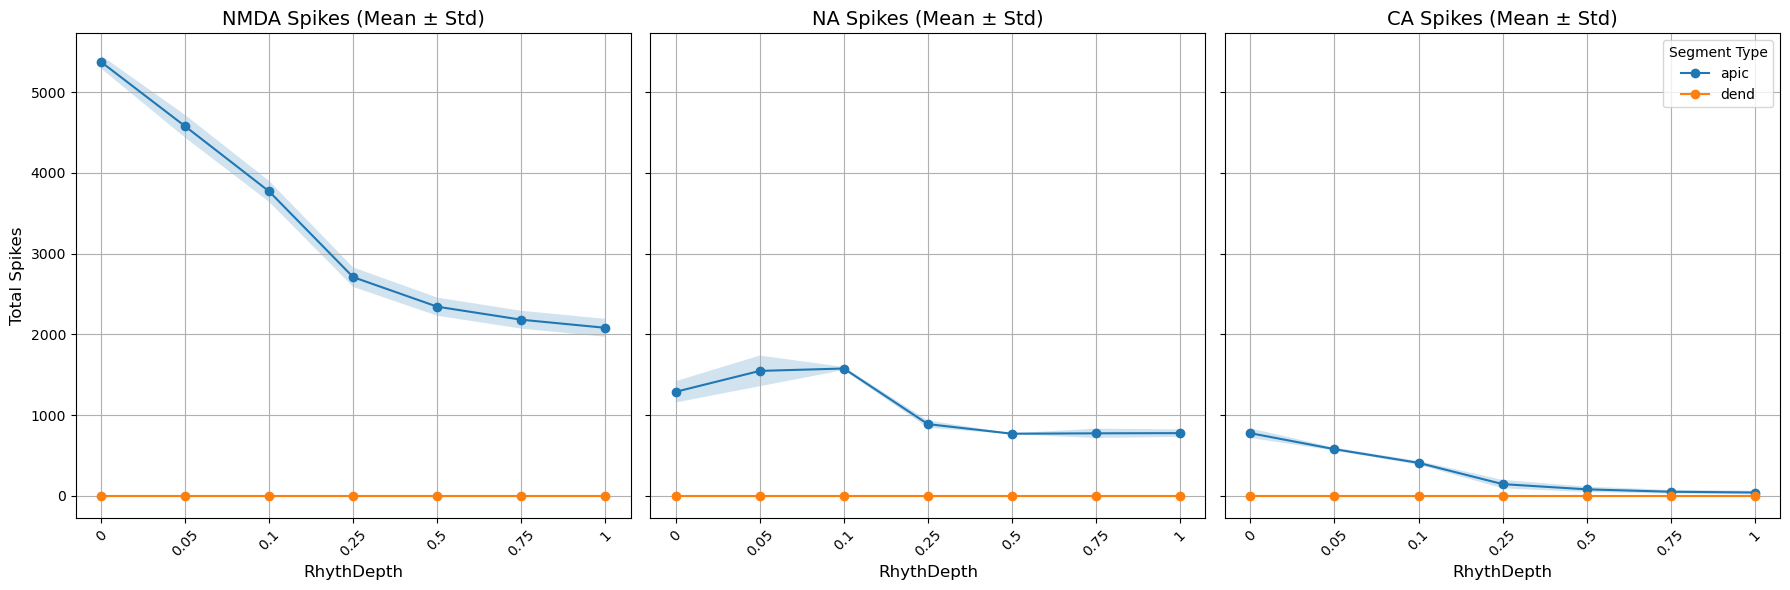

In [10]:
import matplotlib.pyplot as plt

# Plotting code with shaded standard deviation
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define spike types and corresponding mean and std column names
spike_types = ['Total_NMDA_Spikes', 'Total_NA_Spikes', 'Total_CA_Spikes']
titles = ['NMDA Spikes', 'NA Spikes', 'CA Spikes']

# Create subplots for each spike type
for ax, spike_type, title in zip(axes, spike_types, titles):
    for segment_type in grouped_stats['Segment_Type'].unique():
        subset = grouped_stats[grouped_stats['Segment_Type'] == segment_type]
        mean_col = f'{spike_type}_mean'
        std_col = f'{spike_type}_std'

        # Plot the mean line
        ax.plot(
            subset['RhythDepth'], 
            subset[mean_col], 
            marker='o', 
            label=f'{segment_type}'
        )

        # Add shaded area for standard deviation
        ax.fill_between(
            subset['RhythDepth'],
            subset[mean_col] - subset[std_col],
            subset[mean_col] + subset[std_col],
            alpha=0.2  # Transparency for shading
        )

    # Title and grid for the subplot
    ax.set_title(f'{title} (Mean ± Std)', fontsize=14)
    ax.set_xlabel('RhythDepth', fontsize=12)
    ax.grid(True)

# Add shared y-axis label
axes[0].set_ylabel('Total Spikes', fontsize=12)

# Add legend to the last subplot
axes[-1].legend(title='Segment Type', fontsize=10)

# Rotate x-axis labels
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


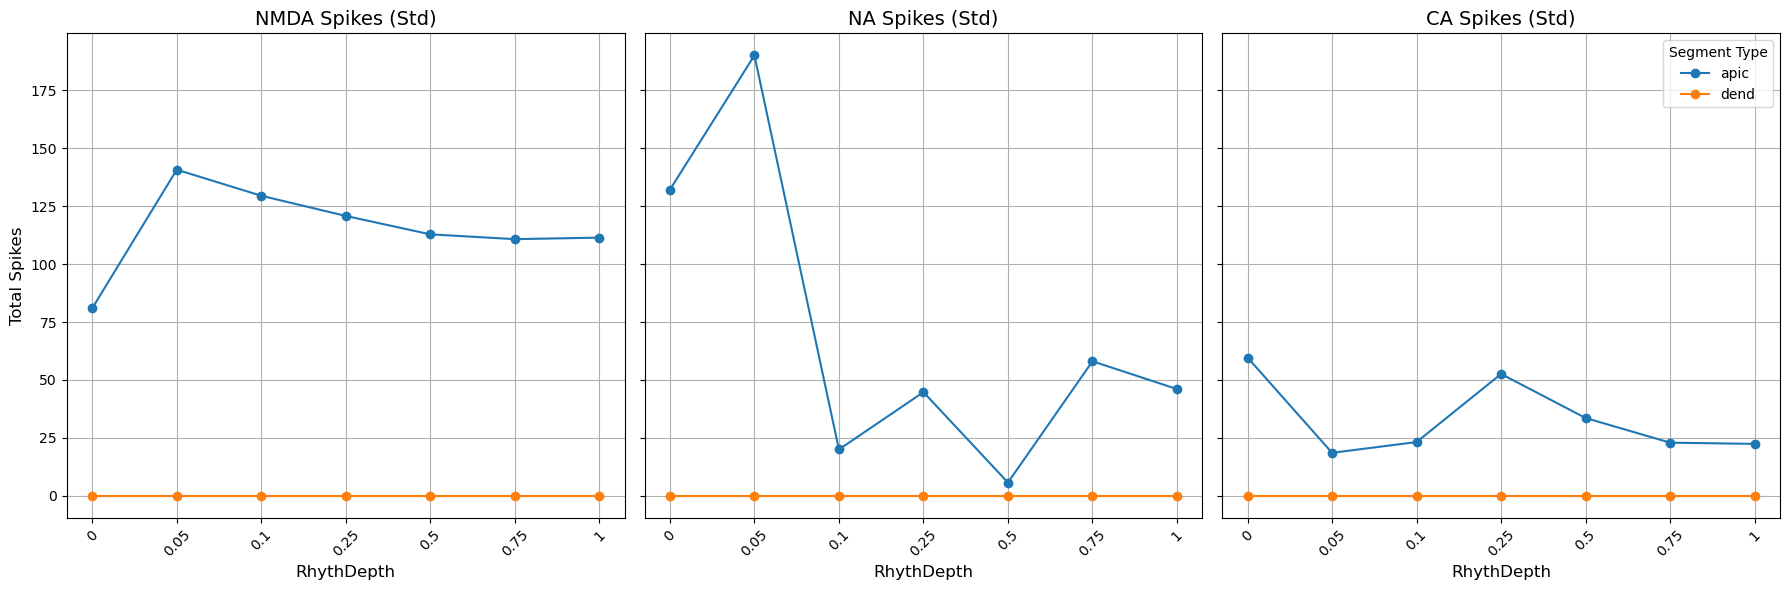

In [14]:
import matplotlib.pyplot as plt

# Plotting code with shaded standard deviation
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define spike types and corresponding mean and std column names
spike_types = ['Total_NMDA_Spikes', 'Total_NA_Spikes', 'Total_CA_Spikes']
titles = ['NMDA Spikes', 'NA Spikes', 'CA Spikes']

# Create subplots for each spike type
for ax, spike_type, title in zip(axes, spike_types, titles):
    for segment_type in grouped_stats['Segment_Type'].unique():
        subset = grouped_stats[grouped_stats['Segment_Type'] == segment_type]
        mean_col = f'{spike_type}_mean'
        std_col = f'{spike_type}_std'

        # Plot the mean line
        ax.plot(
            subset['RhythDepth'], 
            subset[std_col], 
            marker='o', 
            label=f'{segment_type}'
        )

        # # Add shaded area for standard deviation
        # ax.fill_between(
        #     subset['RhythDepth'],
        #     subset[mean_col] - subset[std_col],
        #     subset[mean_col] + subset[std_col],
        #     alpha=0.2  # Transparency for shading
        # )

    # Title and grid for the subplot
    ax.set_title(f'{title} (Std)', fontsize=14)
    ax.set_xlabel('RhythDepth', fontsize=12)
    ax.grid(True)

# Add shared y-axis label
axes[0].set_ylabel('Total Spikes', fontsize=12)

# Add legend to the last subplot
axes[-1].legend(title='Segment Type', fontsize=10)

# Rotate x-axis labels
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## soma firing rate

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


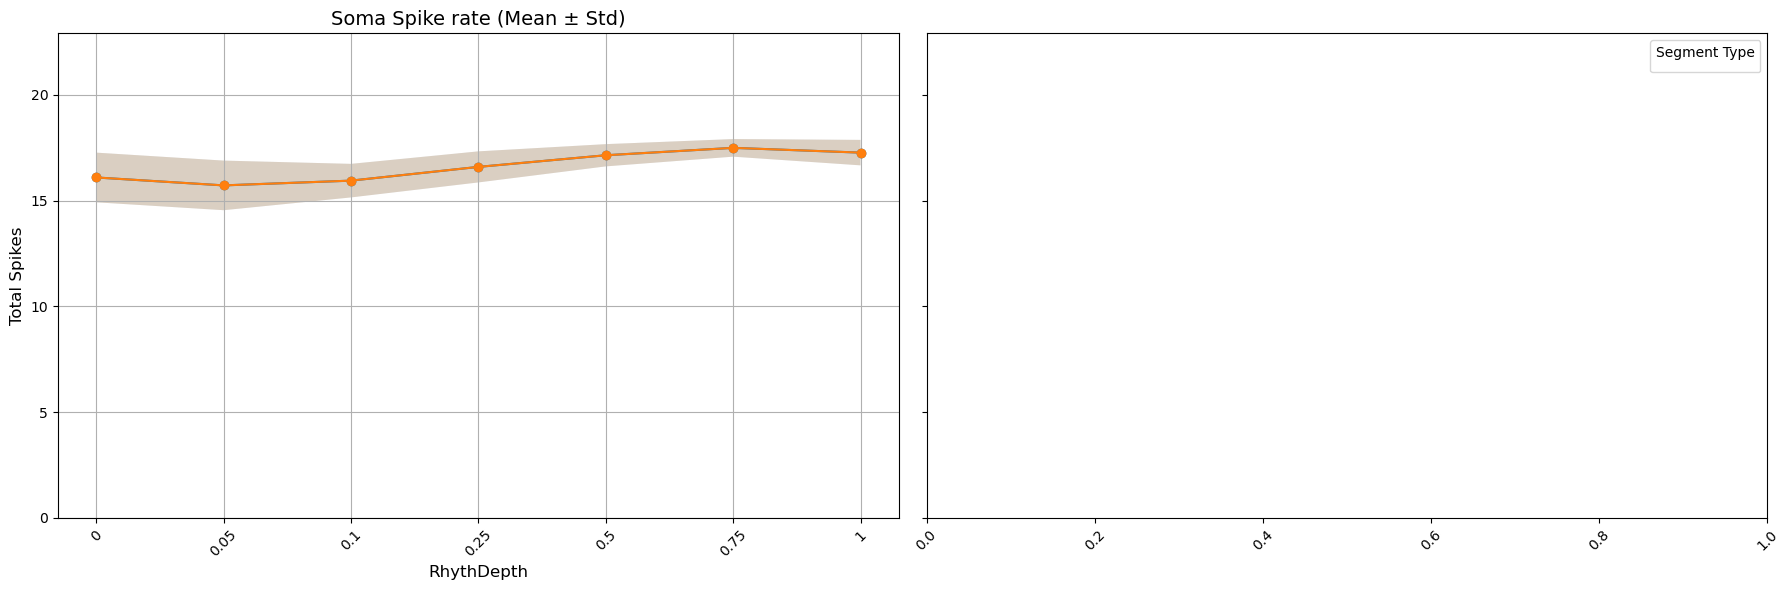

In [11]:
# Plotting code with shaded standard deviation
fig, axes = plt.subplots(1,2,figsize=(18, 6), sharey=True)

# Define spike types and corresponding mean and std column names
spike_types = ['soma_firing_rate']
titles = ['Soma Spike rate']

# Create subplots for each spike type
for ax, spike_type, title in zip(axes, spike_types, titles):
    for segment_type in grouped_stats['Segment_Type'].unique():
        subset = grouped_stats[grouped_stats['Segment_Type'] == segment_type]
        mean_col = f'{spike_type}_mean'
        std_col = f'{spike_type}_std'

        # Plot the mean line
        ax.plot(
            subset['RhythDepth'], 
            subset[mean_col], 
            marker='o', 
            label=f'{segment_type}'
        )

        # Add shaded area for standard deviation
        ax.fill_between(
            subset['RhythDepth'],
            subset[mean_col] - subset[std_col],
            subset[mean_col] + subset[std_col],
            alpha=0.2  # Transparency for shading
        )

    # Title and grid for the subplot
    ax.set_ylim([0,max(subset[mean_col] + subset[std_col])+5])
    ax.set_title(f'{title} (Mean ± Std)', fontsize=14)
    ax.set_xlabel('RhythDepth', fontsize=12)
    ax.grid(True)

# Add shared y-axis label
axes[0].set_ylabel('Total Spikes', fontsize=12)

# Add legend to the last subplot
axes[-1].legend(title='Segment Type', fontsize=10)

# Rotate x-axis labels
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
import pandas as pd
na_df = pd.read_csv('/home/drfrbc/Neural-Modeling/scripts/2025-01-13-14-26-16-BenSynapses_testing_depth_of_mod/Complex_InhGmaxApic7.1_InhGmaxDend0.0016_SomaGmax0.0025_ExcGmax-1.0351_Np100000_RhythDepth0/na.csv')

In [13]:
na_df[na_df.section=='dend']

,Unnamed: 0.1,segmentID,Unnamed: 0,section,idx_in_section_type,seg_half_seg_RA,L,seg,pseg,Section_L,...,Sec ID,Type,Coord X,Coord Y,Coord Z,Elec_distance,Elec_distance_nexus,X,Elec_distanceQ,na_lower_bound
1,1,1,1,dend,0,2.647135,4.840176,L5PCtemplate[0].dend[0](0.1),L5PCtemplate[0].soma[0](0.5),24.200878,...,0,dend,58.736230,20.787594,-50.027254,0.896041,0.260380,0.100000,9.0,NaN
2,2,2,2,dend,0,2.250969,4.840176,L5PCtemplate[0].dend[0](0.3),L5PCtemplate[0].dend[0](0.1),24.200878,...,0,dend,62.939716,21.939324,-50.557475,0.781279,0.227032,0.300000,9.0,NaN
3,3,3,3,dend,0,2.250969,4.840176,L5PCtemplate[0].dend[0](0.5),L5PCtemplate[0].dend[0](0.3),24.200878,...,0,dend,66.929149,21.040891,-51.991813,0.684891,0.199022,0.500000,9.0,NaN
4,4,4,4,dend,0,2.250969,4.840176,L5PCtemplate[0].dend[0](0.7),L5PCtemplate[0].dend[0](0.5),24.200878,...,0,dend,69.673642,19.672918,-48.246989,0.605616,0.175986,0.700000,9.0,NaN
5,5,5,5,dend,0,2.250969,4.840176,L5PCtemplate[0].dend[0](0.9),L5PCtemplate[0].dend[0](0.7),24.200878,...,0,dend,72.325774,18.515316,-44.961458,0.540541,0.157076,0.900000,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,1018,1018,dend,82,38.003521,5.020416,L5PCtemplate[0].dend[82](0.944444),L5PCtemplate[0].dend[82](0.907407),135.551226,...,82,dend,-59.416291,-62.184423,-68.580050,0.009268,0.002693,0.944444,0.0,NaN
1019,1019,1019,1019,dend,82,38.003521,5.020416,L5PCtemplate[0].dend[82](0.981481),L5PCtemplate[0].dend[82](0.944444),135.551226,...,82,dend,-60.968091,-66.505750,-66.749940,0.008909,0.002589,0.981481,0.0,NaN
1020,1020,1020,1020,dend,83,4.729226,5.752748,L5PCtemplate[0].dend[83](0.166667),L5PCtemplate[0].dend[81](1),17.258243,...,83,dend,8.511408,13.717459,-84.999336,0.272941,0.079314,0.166667,8.0,NaN
1021,1021,1021,1021,dend,83,4.729226,5.752748,L5PCtemplate[0].dend[83](0.5),L5PCtemplate[0].dend[83](0.166667),17.258243,...,83,dend,7.619937,12.487844,-90.547978,0.240845,0.069987,0.500000,8.0,NaN
